In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

C:\Users\Basel\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\Basel\Desktop\Mr Taha\Wind_Time_Series_Dataset\Wind Time Series Dataset(hourly).csv",index_col=[0])

In [3]:
df.columns

Index(['WindSpeed', 'Power'], dtype='object')

In [38]:
df.describe()

,WindSpeed,Power
count,7265.000000,7265.000000
mean,6.842653,30.722012
std,2.090319,26.140030
min,0.658333,-0.007123
25%,5.273333,9.461201
50%,6.668333,22.952010
75%,8.113333,46.109500
max,19.086667,99.433638


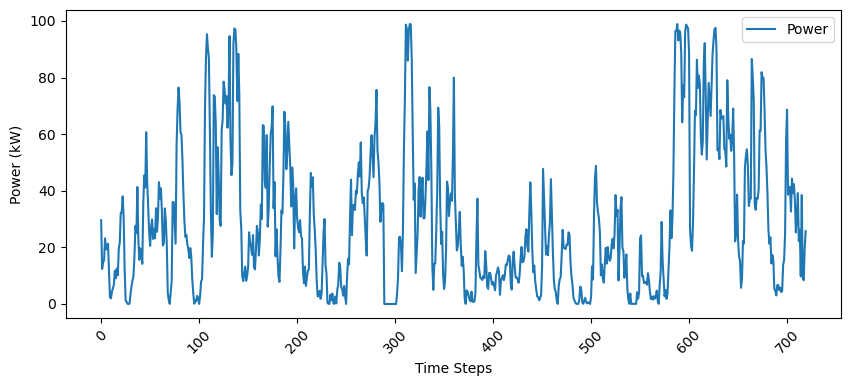

In [39]:
df['Power'][:24*30].reset_index().plot(figsize=(10,4))
plt.ylabel("Power (kW)")
plt.xlabel('Time Steps')
plt.xticks(rotation=45)
plt.show()

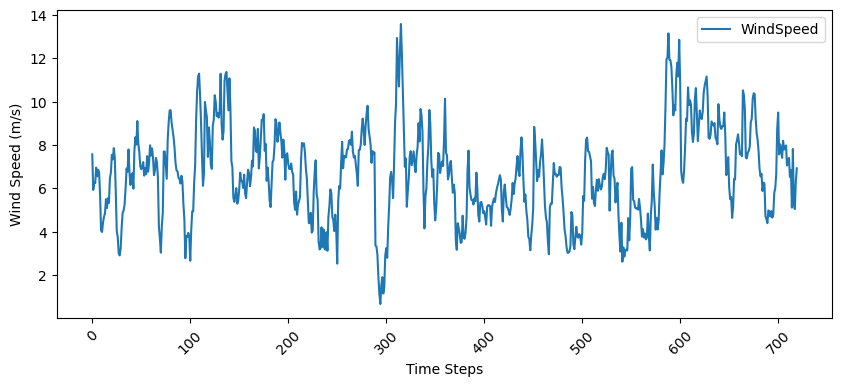

In [40]:
df['WindSpeed'][:24*30].reset_index().plot(figsize=(10,4))
plt.xticks(rotation=45)
plt.ylabel("Wind Speed (m/s)")
plt.xlabel('Time Steps')
plt.show()

In [6]:
df.isnull().sum()

WindSpeed    0
Power        0
dtype: int64

In [7]:
df.head()

,WindSpeed,Power
Time,,
2014-10-07 02:00:00,7.567500,29.605953
2014-10-07 03:00:00,5.921667,12.383663
2014-10-07 04:00:00,6.256667,14.702530
2014-10-07 05:00:00,6.238333,15.391273
2014-10-07 06:00:00,6.951667,23.176807


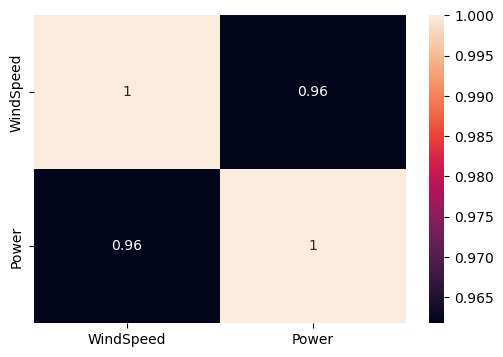

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.index.min()

'2014-10-07 02:00:00'

In [10]:
df.index.max()

'2015-10-07 00:00:00'

In [11]:
df_train=df[:'2015-10-01 00:00:00']

In [12]:
df_test=df['2015-10-01 00:00:00':]

In [13]:
df.columns

Index(['WindSpeed', 'Power'], dtype='object')

In [14]:
df_train=df[:'2015-10-01 00:00:00']

In [15]:
df_test=df['2015-10-01 00:00:00':]

In [16]:
len(df_train)

7139

In [17]:
len(df_test)

126

In [18]:
len(df)

7265

In [19]:
def create_dataset(data, look_back=24):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

In [20]:
values = df['Power'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

look_back = 24
X, y = create_dataset(scaled, look_back)

In [21]:
train_size = int(7139-24)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
model = SVR(kernel='rbf')
model.fit(X_train.squeeze(), y_train.ravel())

SVR()

In [23]:
y_pred = model.predict(X_test.squeeze())

In [24]:
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1,1))

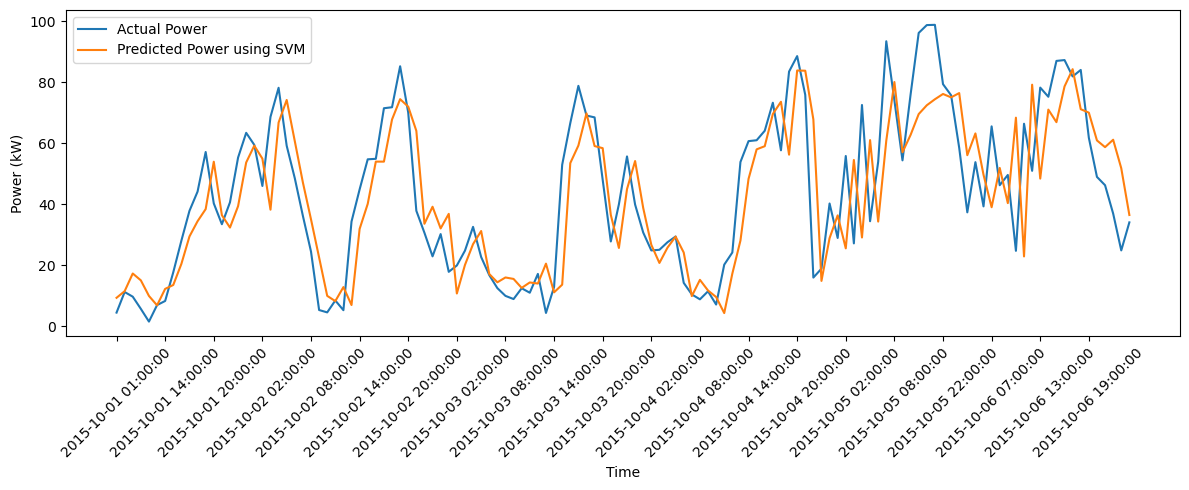

In [27]:
import matplotlib.pyplot as plt

tick_indices = range(0, len(df_test.index), 6)
tick_labels = df_test.index[tick_indices]

plt.figure(figsize=(12,5))
plt.plot(df_test.index, y_test_inverse, label='Actual Power')
plt.plot(df_test.index, y_pred_inverse, label='Predicted Power using SVM')

plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.xticks(tick_indices, tick_labels, rotation=45)  # set every 4th tick
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

print("MAE:", np.round(mae,2))
print("MSE:", np.round(mse,2))
print("RMSE:", np.round(rmse,2))
print("R²:", np.round(r2*100,2),"%")

MAE: 12.14
MSE: 260.72
RMSE: 16.15
R²: 61.46 %


In [44]:
df=pd.DataFrame(data={'Actual':y_test_inverse.squeeze(),'SVM':y_pred_inverse.squeeze()})

In [46]:
df.to_csv(r'C:\Users\Basel\Desktop\Mr Taha\Wind_Time_Series_Dataset\SVM Prediction.csv')

#### 